<a href="https://colab.research.google.com/github/kvgs/sinan_sus/blob/main/viol20_sinan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dicionários SINAN:**

[VERSÃO 5.0/Patch 5.1](http://portalsinan.saude.gov.br/images/documentos/Agravos/Notificacao_Individual/DIC_DADOS_NET---Notificao-Individual_rev.pdf)


[VERSÃO 5.0](http://portalsinan.saude.gov.br/images/documentos/Agravos/Notificacao_Individual/DIC_DADOS_NET---Notificao-Individual_rev.pdf)

[VERSÃO 4.0](https://nepas.ufsc.br/files/2012/09/DICION%C3%81RIO-DE-DADOS-%E2%80%93-SINAN-NET-%E2%80%93-VERS%C3%83O-4-.-0.pdf)



---
[Dados violência doméstica, sexual e/ou outras violências (VIOLBR20.dbc)](https://datasus.saude.gov.br/transferencia-de-arquivos/)

[Biblioteca Python para trabalhar com arquivos .dbc](https://pypi.org/project/pyreaddbc/)

[Arquivo da malha municipal (BR_UF_2022.ZIP)](https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html)

[Referência de código dos países
](https://integracao.esusab.ufsc.br/ledi/documentacao/referencias/paises.html)

[Estimativa da população por UF em 2020](https://sidra.ibge.gov.br/tabela/6579)

### **Processamento de dados**

In [ ]:
!pip install pyreaddbc
!pip install descartes
!pip install geopandas
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pyreaddbc
from dbfread import DBF

In [ ]:
pyreaddbc.dbc2dbf("VIOLBR20.dbc", "VIOLBR20.dbf")

In [ ]:
# ler o arquivo .dbf
table = DBF("VIOLBR20.dbf", encoding="iso-8859-1")

# convertendo para um DataFrame do pandas
VIOLBR20 = pd.DataFrame(iter(table))

In [ ]:
colunas_VIOLBR20 = VIOLBR20.columns.tolist()

for coluna in colunas_VIOLBR20:
    print(coluna)

In [ ]:
VIOLBR20.rename(columns={
    'TP_NOT': 'tipo_notificacao',
    'ID_AGRAVO': 'id_agravo',
    'DT_NOTIFIC': 'data_notificacao',
    'SEM_NOT': 'sem_epidem_not',
    'NU_ANO': 'ano_notificacao',
    'SG_UF_NOT': 'uf_notificacao',
    'ID_MUNICIP': 'municipio_notificacao',
    'ID_UNIDADE': 'id_unidade',
    'DT_OCOR': 'data_ocorrencia',
    'SEM_PRI': 'semana_sintoma',
    'ANO_NASC': 'ano_nascimento',
    'NU_IDADE_N': 'idade',
    'CS_SEXO': 'sexo',
    'CS_GESTANT': 'gestante',
    'CS_RACA': 'raca',
    'CS_ESCOL_N': 'escolaridade',
    'SG_UF': 'uf_residencia',
    'ID_MN_RESI': 'municipio_residencia',
    'ID_PAIS': 'pais_residencia',
    'NDUPLIC': 'duplicidade',
    'DT_INVEST': 'data_investigacao',
    'ID_OCUPA_N': 'ocupacao',
    'SIT_CONJUG': 'situacao_conjugal',
    'DEF_TRANS': 'deficiencia_transtorno',
    'DEF_FISICA': 'deficiencia_fisica',
    'DEF_MENTAL': 'deficiencia_mental',
    'DEF_VISUAL': 'deficiencia_visual',
    'DEF_AUDITI': 'deficiencia_auditiva',
    'TRAN_MENT': 'transtorno_mental',
    'TRAN_COMP': 'transtorno_comportamental',
    'DEF_OUT': 'outras_deficiencias',
    'DEF_ESPEC': 'especificar_deficiencia',
    'SG_UF_OCOR': 'uf_ocorrencia',
    'ID_MN_OCOR': 'municipio_ocorrencia',
    'HORA_OCOR': 'hora_ocorrencia',
    'LOCAL_OCOR': 'local_ocorrencia',
    'LOCAL_ESPE': 'local_especificacao',
    'OUT_VEZES': 'outras_vezes',
    'LES_AUTOP': 'lesao_autoprovocada',
    'VIOL_FISIC': 'violencia_fisica',
    'VIOL_PSICO': 'violencia_psicologica',
    'VIOL_TORT': 'tortura',
    'VIOL_SEXU': 'violencia_sexual',
    'VIOL_TRAF': 'trafico',
    'VIOL_FINAN': 'violencia_financeira',
    'VIOL_NEGLI': 'negligencia',
    'VIOL_INFAN': 'trabalho_infantil',
    'VIOL_LEGAL': 'intervencao_legal',
    'VIOL_OUTR': 'outra_violencia',
    'VIOL_ESPEC': 'especificar_violencia',
    'AG_FORCA': 'agressao_corporal',
    'AG_ENFOR': 'agressao_enforcamento',
    'AG_OBJETO': 'agressao_objeto',
    'AG_CORTE': 'agressao_corte',
    'AG_QUENTE': 'agressao_objquente',
    'AG_ENVEN': 'agressao_envenenamento',
    'AG_FOGO': 'agressao_armadefogo',
    'AG_AMEACA': 'agressao_ameaca',
    'AG_OUTROS': 'agressao_outros',
    'AG_ESPEC': 'especificar_agressao',
    'SEX_ASSEDI': 'assedio_sexual',
    'SEX_ESTUPR': 'estupro',
    'SEX_PUDOR': 'atentado_pudor',
    'SEX_PORNO': 'pornografia_infantil',
    'SEX_EXPLO': 'exploracao_sexual',
    'SEX_OUTRO': 'outra_violenciasexual',
    'SEX_ESPEC': 'especificar_violenciasexual',
    'PEN_ORAL': 'penetracao_oral',
    'PEN_ANAL': 'penetracao_anal',
    'PEN_VAGINA': 'penetracao_vaginal',
    'PROC_DST': 'profilaxia_dst',
    'PROC_HIV': 'profilaxia_hiv',
    'PROC_HEPB': 'profilaxia_hepatiteb',
    'PROC_SANG': 'coleta_sangue',
    'PROC_SEMEN': 'coleta_semen',
    'PROC_VAGIN': 'coleta_secrecaovaginal',
    'PROC_CONTR': 'contracepcao_emergencial',
    'PROC_ABORT': 'aborto_previsto_lei',
    'CONS_ABORT': 'consequencia_aborto',
    'CONS_GRAV': 'consequencia_gravidez',
    'CONS_DST': 'consequencia_dst',
    'CONS_SUIC': 'consequencia_tentativasuicidio',
    'CONS_MENT': 'consequencia_transtornomental',
    'CONS_COMP': 'consequencia_transtornocomportamental',
    'CONS_ESTRE': 'consequencia_TSPT',
    'CONS_OUTR': 'consequencia_outros',
    'CONS_ESPEC': 'consequencia_especificar',
    'LESAO_NAT': 'natureza_lesao',
    'LESAO_ESPE': 'lesao_especificar',
    'LESAO_CORP': 'lesao_corporal',
    'NUM_ENVOLV': 'numero_envolvidos',
    'REL_SEXUAL': 'relacoes_sexuais',
    'REL_PAI': 'provavel_autor_pai',
    'REL_MAE': 'provavel_autor_mae',
    'REL_MAD': 'provavel_autor_madrasta',
    'REL_PAD': 'provavel_autor_padrasto',
    'REL_CONJ': 'provavel_autor_conjuge',
    'REL_EXCON': 'provavel_autor_exconjuge',
    'REL_NAMO': 'provavel_autor_namorado',
    'REL_EXNAM': 'provavel_autor_exnamorado',
    'REL_FILHO': 'provavel_autor_filho',
    'REL_DESCO': 'provavel_autor_desconhecido',
    'REL_IRMAO': 'provavel_autor_irmao',
    'REL_CONHEC': 'provavel_autor_conhecido',
    'REL_CUIDA': 'provavel_autor_cuidador',
    'REL_PATRAO': 'provavel_autor_chefe',
    'REL_INST': 'provavel_autor_institucional',
    'REL_POL': 'provavel_autor_policial',
    'REL_PROPRI': 'provavel_autor_propriapessoa',
    'REL_OUTROS': 'provavel_autor_outros',
    'REL_ESPEC': 'especificar_provavel_autor',
    'AUTOR_SEXO': 'sexo_autor',
    'AUTOR_ALCO': 'alcool_autor',
    'ENC_SAUDE': 'encaminhamento_redesaude',
    'ENC_TUTELA': 'encaminhamento_conselhotutelar2',
    'ENC_VARA': 'encaminhamento_vara',
    'ENC_ABRIGO': 'encaminhamento_abrigo',
    'ENC_SENTIN': 'encaminhamento_sentinela',
    'ENC_DEAM': 'encaminhamento_deam',
    'ENC_DPCA': 'encaminhamento_dpca',
    'ENC_DELEG': 'encaminhamento_delegacia',
    'ENC_MPU': 'encaminhamento_ministeriopublico',
    'ENC_MULHER': 'encaminhamento_redemulher',
    'ENC_CREAS': 'encaminhamento_creas',
    'ENC_IML': 'encaminhamento_iml',
    'ENC_OUTR': 'encaminhamento_outros',
    'REDE_SAU': 'encaminhamento_redesaude',
    'ASSIST_SOC': 'encaminhamento_assistenciasocial',
    'REDE_EDUCA': 'encaminhamento_redeeducacao',
    'ATEND_MULH': 'encaminhamento_atend_mulher',
    'CONS_TUTEL': 'encaminhamento_conselhotutelar',
    'CONS_IDO': 'encaminhamento_conselhoidoso',
    'DELEG_IDOS': 'encaminhamento_delegaciaidoso',
    'DIR_HUMAN': 'encaminhamento_crdh',
    'MPU': 'encaminhamento_mpu',
    'DELEG_CRIA': 'encaminhamento_delegaciacrianca',
    'DELEG_MULH': 'encaminhamento_delegaciamulher',
    'DELEG': 'encaminhamento_deleg',
    'INFAN_JUV': 'encaminhamento_justicainfanciajuventude',
    'DEFEN_PUBL': 'encaminhamento_defensoriapublica',
    'ENC_ESPEC': 'especificar_encaminhamento',
    'REL_TRAB': 'relacionada_trabalho',
    'REL_CAT': 'emissao_cat',
    'CIRC_LESAO': 'cid_lesao',
    'CLASSI_FIN': 'classificacao_final',
    'EVOLUCAO': 'evolucao_caso',
    'DT_OBITO': 'obito',
    'DT_DIGITA': 'digitacao',
    'DT_TRANSUS': 'transferencia_sus',
    'DT_TRANSDM': 'transferencia_distritomunicipal',
    'DT_TRANSSM': 'transferencia_secretariamunicipalsaude',
    'DT_TRANSRM': 'transferencia_regionalmunicipal',
    'DT_TRANSRS': 'transferencia_regionalsaude',
    'DT_TRANSSE': 'transferencia_secretariaestadualsaude',
    'TPUNINOT': 'tpuninot',
    'ORIENT_SEX': 'orientacao_sexual',
    'IDENT_GEN': 'identidade_genero',
    'VIOL_MOTIV': 'motivo_violencia',
    'CICL_VID': 'ciclo_de_vida_autor',
    'DT_ENCERRA': 'data_encerramento'
    }, inplace=True)

In [ ]:
# mapeamento conforme dicionário sinan
mapeamento_genero = {
    '1':'Travesti',
    '2':'Transexual Mulher',
    '3':'Transexual Homem',
    '8':'Não se aplica',
    '9':'Ignorado',
    '': ''
}

mapeamento_motivacao = {
    '01':'Sexismo',
    '02':'LGBTfobia',
    '03':'Racismo',
    '04':'Intolerância religiosa',
    '05':'Xenofobia',
    '06':'Conflito geracional',
    '07':'Situação de rua',
    '08':'Deficiência',
    '09':'Outros',
    '88':'Não se aplica ',
    '99':'Ignorado',
    '': ''
}

mapeamento_ciclovida = {
    '1':'Criança',
    '2':'Adolescente',
    '3':'Jovem',
    '4':'Pessoa adulta',
    '5':'Pessoa idosa',
    '9':'Ignorado',
    '': ''
}

mapeamento_escolaridade = {
    '00': 'Analfabeto',
    '01':'Fundamental I incompleto',
    '02':'Fundamental I completo',
    '03':'Fundamental II incompleto',
    '04':'Fundamental II completo',
    '05':'Ensino médio incompleto',
    '06':'Ensino médio completo',
    '07':'Superior incompleta',
    '08':'Superior completa',
    '09':'Ignorado',
    '10':'Não se aplica',
    '': ''
}

mapeamento_raca = {
    '1': 'Branca',
    '2': 'Preta',
    '3': 'Amarela',
    '4': 'Parda',
    '5': 'Indígena',
    '9': 'Ignorado',
    '': ''
}

mapeamento_gestante = {
    '1': '1º Trimestre',
    '2': '2º Trimestre',
    '3': '3º Trimestre',
    '4': 'Idade gestacional ignorada',
    '5': 'Não',
    '6': 'Não se aplica',
    '8': '8',
    '9': 'Ignorado',
    '': ''
}

mapeamento_uf = {
    '43': 'RS',
    '35': 'SP',
    '53': 'DF',
    '33': 'RJ',
    '23': 'CE',
    '13': 'AM',
    '41': 'PR',
    '31': 'MG',
    '27': 'AL',
    '26': 'PE',
    '52': 'GO',
    '50': 'MS',
    '21': 'MA',
    '51': 'MT',
    '17': 'TO',
    '15': 'PA',
    '42': 'SC',
    '14': 'RR',
    '25': 'PB',
    '32': 'ES',
    '22': 'PI',
    '29': 'BA',
    '24': 'RN',
    '11': 'RO',
    '28': 'SE',
    '12': 'AC',
    '16': 'AP'
}

mapeamento_notificacao = {
    '1': 'Negativa',
    '2': 'Individual',
    '3': 'Surto',
    '4': 'Agregado',
}

mapeamento_conjuge = {
    '1': 'Solteiro',
    '2': 'Casado/ União consensual',
    '3': 'Viúvo',
    '4': 'Separado',
    '8': 'Não se aplica',
    '9': 'Ignorado',
    '': ''
}

mapeamento_pais = {
    '1': 'Afeganistao',
    '7': 'Anguilla',
    '32': 'Brunei',
    '45': 'China',
    '96': 'Honduras',
    '126': 'Irã',
    '137':'Kuweit',
    '138': 'Laos',
    '192': 'República Dominicana',
    'BRAS': 'Brasil',
    'PORT': 'Portugal',
    '': ''
}

mapeamento_sexo = {
    'M': 'Masculino',
    'F': 'Feminino',
    'I': 'Ignorado',
}

mapeamento_lesao = {
    '01': 'Contusão',
    '02': 'Corte/perfuração/laceração',
    '03': 'Entorse/luxação',
    '04': 'Fratura',
    '05': 'Amputação',
    '06': 'Traumatismo dentário',
    '07': 'Traumatismo crânio',
    '08': 'Politraumatismo',
    '09': 'Intoxicação',
    '10': 'Queimadura',
    '11': 'Outros',
    '88': 'Não se aplica',
    '99': 'Ignorado'
}

mapeamento_local_lesao = {
    '01': 'Cabeça/face',
    '02': 'Pescoço',
    '03': 'Boca/dentes',
    '04': 'Coluna/medula',
    '05': 'Tórax/dorso',
    '06': 'Abdome',
    '07': 'Quadril/pelve',
    '08': 'Membros superiores',
    '09': 'Membros inferiores',
    '10': 'Órgãos genitais/ânus',
    '11': 'Múltiplos órgãos/regiões',
    '88': 'Não se aplica',
    '99': 'Ignorado',
    '': ''
}

mapeamento_local_ocorrencia = {
    '01': 'Residência',
    '02': 'Habitação coletiva',
    '03': 'Escola',
    '04': 'Local de prática esportiva',
    '05': 'Bar ou similar',
    '06': 'Via publica',
    '07': 'Comércio/Serviços',
    '08': 'Industrias/ construção',
    '09': 'Outro',
    '99': 'Ignorado'
}

mapeamento_sexoautor = {
    '1': 'Masculino',
    '2': 'Feminino',
    '3': 'Ambos os sexos',
    '8': 'Não se aplica',
    '9': 'Ignorado',
    '': ''
}

mapeamento_qtenvolvidos = {
    '1': 'Um',
    '2': 'Dois ou mais',
    '3': '3 (não achei no dicionário)',
    '9': 'Ignorado',
    '': ''
}

mapeamento_sexual = {
    '1': 'Só com homens',
    '2': 'Só com mulheres',
    '3': 'Com homens e mulheres',
    '8': 'Não se aplica',
    '9': 'Ignorado',
    '': ''
}

mapeamento_evolucao = {
    '1': 'Alta',
    '2': 'Evasão/fuga',
    '3': 'Óbito por violência',
    '4': 'Óbito por outras causas',
    '9': 'Ignorado',
    '': ''
}

mapeamento_final = {
    '1': 'Confirmado',
    '2': 'Descartado',
    '3': 'Provável',
    '8': 'Inconclusivo',
    '': ''
}

mapeamento_orientacaosex = {
    '1': 'Heterossexual',
    '2': 'Homossexual (gay/lésbica)',
    '3': 'Bissexual',
    '8': 'Não se aplica',
    '9': 'Ignorado'
}


# usado para as colunas: outras_vezes, lesao_autoprovocada, alcool_autor, emissao_cat, provavel_autor, encaminhamento, deficiencias e transtornos, violencias, procedimentos e consequencias

mapeamento_comum = {
    '1':'Sim',
    '2':'Não',
    '8': 'Não se aplica',
    '9':'Ignorado',
    '': ''
}

In [ ]:
# substituir valores na coluna usando o mapeamento
VIOLBR20['identidade_genero'] = VIOLBR20['identidade_genero'].replace(mapeamento_genero)
VIOLBR20['motivo_violencia'] = VIOLBR20['motivo_violencia'].replace(mapeamento_motivacao)
VIOLBR20['ciclo_de_vida_autor'] = VIOLBR20['ciclo_de_vida_autor'].replace(mapeamento_ciclovida)
VIOLBR20['escolaridade'] = VIOLBR20['escolaridade'].replace(mapeamento_escolaridade)
VIOLBR20['raca'] = VIOLBR20['raca'].replace(mapeamento_raca)
VIOLBR20['gestante'] = VIOLBR20['gestante'].replace(mapeamento_gestante)
VIOLBR20['uf_residencia'] = VIOLBR20['uf_residencia'].replace(mapeamento_uf)
VIOLBR20['uf_notificacao'] = VIOLBR20['uf_notificacao'].replace(mapeamento_uf)
VIOLBR20['tipo_notificacao'] = VIOLBR20['tipo_notificacao'].replace(mapeamento_notificacao)
VIOLBR20['situacao_conjugal'] = VIOLBR20['situacao_conjugal'].replace(mapeamento_conjuge)
VIOLBR20['pais_residencia'] = VIOLBR20['pais_residencia'].replace(mapeamento_pais)
VIOLBR20['sexo'] = VIOLBR20['sexo'].replace(mapeamento_sexo)
VIOLBR20['natureza_lesao'] = VIOLBR20['natureza_lesao'].replace(mapeamento_lesao)
VIOLBR20['lesao_corporal'] = VIOLBR20['lesao_corporal'].replace(mapeamento_local_lesao)
VIOLBR20['local_ocorrencia'] = VIOLBR20['local_ocorrencia'].replace(mapeamento_local_ocorrencia)
VIOLBR20['sexo_autor'] = VIOLBR20['sexo_autor'].replace(mapeamento_sexoautor)
VIOLBR20['numero_envolvidos'] = VIOLBR20['numero_envolvidos'].replace(mapeamento_qtenvolvidos)
VIOLBR20['relacoes_sexuais'] = VIOLBR20['relacoes_sexuais'].replace(mapeamento_sexual)
VIOLBR20['classificacao_final'] = VIOLBR20['classificacao_final'].replace(mapeamento_final)
VIOLBR20['evolucao_caso'] = VIOLBR20['evolucao_caso'].replace(mapeamento_evolucao)
VIOLBR20['orientacao_sexual'] = VIOLBR20['orientacao_sexual'].replace(mapeamento_orientacaosex)
VIOLBR20['outras_vezes'] = VIOLBR20['outras_vezes'].replace(mapeamento_comum)
VIOLBR20['lesao_autoprovocada'] = VIOLBR20['lesao_autoprovocada'].replace(mapeamento_comum)
VIOLBR20['alcool_autor'] = VIOLBR20['alcool_autor'].replace(mapeamento_comum)
VIOLBR20['emissao_cat'] = VIOLBR20['emissao_cat'].replace(mapeamento_comum)
VIOLBR20['intervencao_legal'] = VIOLBR20['intervencao_legal'].replace(mapeamento_comum)

In [ ]:
# lista de colunas a serem modificadas com o mesmo tipo de mapeamento
provavel_autor = [
'provavel_autor_pai',
'provavel_autor_mae',
'provavel_autor_padrasto',
'provavel_autor_conjuge',
'provavel_autor_exconjuge',
'provavel_autor_namorado',
'provavel_autor_exnamorado',
'provavel_autor_filho',
'provavel_autor_desconhecido',
'provavel_autor_irmao',
'provavel_autor_conhecido',
'provavel_autor_cuidador',
'provavel_autor_chefe',
'provavel_autor_institucional',
'provavel_autor_policial',
'provavel_autor_propriapessoa',
'provavel_autor_outros',
'especificar_provavel_autor'
]

# aplicar a substituição em todas as colunas
for coluna in provavel_autor:
    VIOLBR20[coluna] = VIOLBR20[coluna].replace(mapeamento_comum)

encaminhamentos = [
    'encaminhamento_redesaude',
    'encaminhamento_assistenciasocial',
    'encaminhamento_redeeducacao',
    'encaminhamento_atend_mulher',
    'encaminhamento_conselhotutelar',
    'encaminhamento_conselhoidoso',
    'encaminhamento_delegaciaidoso',
    'encaminhamento_crdh',
    'encaminhamento_mpu',
    'encaminhamento_delegaciacrianca',
    'encaminhamento_delegaciamulher',
    'encaminhamento_deleg',
    'encaminhamento_justicainfanciajuventude',
    'encaminhamento_defensoriapublica',
    'encaminhamento_redesaude',
    'encaminhamento_conselhotutelar2',
    'encaminhamento_vara',
    'encaminhamento_abrigo',
    'encaminhamento_sentinela',
    'encaminhamento_deam',
    'encaminhamento_dpca',
    'encaminhamento_delegacia',
    'encaminhamento_ministeriopublico',
    'encaminhamento_redemulher',
    'encaminhamento_creas',
    'encaminhamento_iml',
    'encaminhamento_outros'
]

for coluna in encaminhamentos:
    VIOLBR20[coluna] = VIOLBR20[coluna].replace(mapeamento_comum)

deficiencias = [
    'deficiencia_transtorno',
    'deficiencia_fisica',
    'deficiencia_mental',
    'deficiencia_visual',
    'deficiencia_auditiva',
    'transtorno_mental',
    'transtorno_comportamental'
]

for coluna in deficiencias:
    VIOLBR20[coluna] = VIOLBR20[coluna].replace(mapeamento_comum)

violencias = [
   'violencia_fisica',
   'violencia_psicologica',
   'tortura',
   'violencia_sexual',
   'trafico',
   'violencia_financeira',
   'trabalho_infantil',
   'outra_violencia',
   'agressao_corporal',
   'agressao_enforcamento',
   'agressao_objeto',
   'agressao_corte',
   'agressao_objquente',
   'agressao_envenenamento',
   'agressao_armadefogo',
   'agressao_ameaca',
   'agressao_outros',
   'assedio_sexual',
   'estupro',
   'atentado_pudor',
   'pornografia_infantil',
   'exploracao_sexual',
   'outra_violenciasexual',
   'penetracao_oral',
   'penetracao_anal',
   'penetracao_vaginal',
   'relacionada_trabalho',
   'negligencia'
]

for coluna in violencias:
    VIOLBR20[coluna] = VIOLBR20[coluna].replace(mapeamento_comum)

procedimentos = [
   'coleta_sangue',
   'coleta_semen',
   'coleta_secrecaovaginal',
   'profilaxia_dst',
   'profilaxia_hiv',
   'profilaxia_hepatiteb',
   'contracepcao_emergencial',
   'aborto_previsto_lei'
]

for coluna in procedimentos:
    VIOLBR20[coluna] = VIOLBR20[coluna].replace(mapeamento_comum)

consequencias = [
    'consequencia_aborto',
    'consequencia_gravidez',
    'consequencia_dst',
    'consequencia_tentativasuicidio',
    'consequencia_transtornomental',
    'consequencia_transtornocomportamental',
    'consequencia_TSPT',
    'consequencia_outros'
]

for coluna in consequencias:
    VIOLBR20[coluna] = VIOLBR20[coluna].replace(mapeamento_comum)


In [ ]:
# colunas deletadas
VIOLBR20.drop('id_agravo', axis=1, inplace=True) # todas as linhas estão preenchidas com 'Y09' ('CID Y09: Agressão por meios não especificados')
VIOLBR20.drop('sem_epidem_not', axis=1, inplace=True)
VIOLBR20.drop('ano_notificacao', axis=1, inplace=True)
VIOLBR20.drop('tpuninot', axis=1, inplace=True)
VIOLBR20.drop('semana_sintoma', axis=1, inplace=True)

In [ ]:
def decode_idade(codigo):
    # verifica se o valor é NaN
    if np.isnan(codigo):
        return np.nan

    # convertendo o código para string para facilitar a manipulação
    str_codigo = str(int(codigo))  # removendo possíveis zeros à esquerda

    # pega o primeiro dígito
    unidade = int(str_codigo[0])

    # pega os três últimos dígitos
    valor = int(str_codigo[1:])

    if unidade == 1:
        return f"{valor} horas"
    elif unidade == 2:
        return f"{valor} dias"
    elif unidade == 3:
        return f"{valor} meses"
    elif unidade == 4:
        return f"{valor} anos"
    else:
        return "Código inválido"

# aplica a função de decodificação à coluna 'idade' e cria uma nova coluna 'idade_decodificada'
VIOLBR20['idade_decodificada'] = VIOLBR20['idade'].apply(decode_idade)


In [ ]:
# convertendo colunas object para datetime
VIOLBR20['data_encerramento'] = pd.to_datetime(VIOLBR20['data_encerramento'])

VIOLBR20['data_notificacao'] = pd.to_datetime(VIOLBR20['data_notificacao'])

VIOLBR20['data_ocorrencia'] = pd.to_datetime(VIOLBR20['data_ocorrencia'])

VIOLBR20['ano_nascimento'] = pd.to_datetime(VIOLBR20['ano_nascimento'])

In [ ]:
with pd.option_context('display.max_rows', None):
    print(VIOLBR20.dtypes)

In [ ]:
VIOLBR20.describe()

,idade
count,326318.000000
mean,3994.325033
std,222.094509
min,15.000000
25%,4016.000000
50%,4025.000000
75%,4038.000000
max,4120.000000


In [ ]:
VIOLBR20.isnull().sum()

tipo_notificacao                              0
data_notificacao                              0
uf_notificacao                                0
municipio_notificacao                         0
id_unidade                                    0
                                           ... 
encaminhamento_deleg                          0
encaminhamento_justicainfanciajuventude       0
encaminhamento_defensoriapublica              0
data_encerramento                          7657
idade_decodificada                          185
Length: 156, dtype: int64

In [ ]:
VIOLBR20['uf_notificacao'].value_counts()


SP    79330
MG    38868
PR    31834
RJ    31601
RS    21917
PE    15604
SC    13139
CE    10468
MS     9485
PA     9328
GO     8812
BA     8148
ES     7700
DF     6220
AM     4283
AL     4225
TO     3839
MA     3415
PB     3164
MT     3014
PI     3008
RN     2867
SE     1753
AC     1464
RO     1320
RR     1279
AP      418
Name: uf_notificacao, dtype: int64

In [ ]:
VIOLBR20['idade_decodificada'].value_counts()

17 anos     10169
16 anos      9980
19 anos      9053
20 anos      8812
15 anos      8753
            ...  
5 horas         1
119 anos        1
12 horas        1
117 anos        1
14 horas        1
Name: idade_decodificada, Length: 161, dtype: int64

In [ ]:
VIOLBR20['aborto_previsto_lei'].value_counts()

Não se aplica    283080
Não               24820
                  14766
Ignorado           3116
Sim                 721
Name: aborto_previsto_lei, dtype: int64

In [ ]:
# exportar para CSV
VIOLBR20.to_csv("VIOLBR20.csv.gz", compression="gzip", index=False)

### **Testando algumas análises**

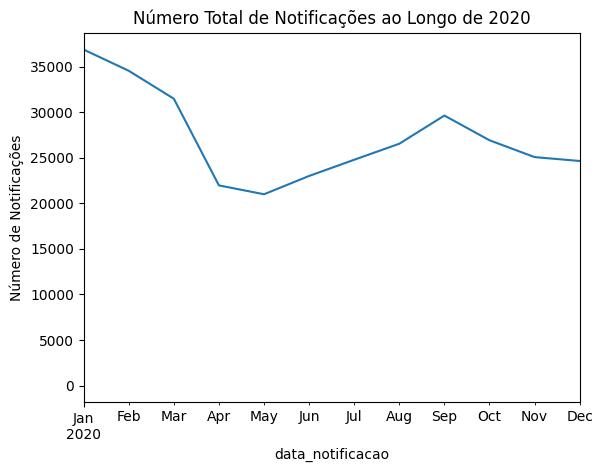

In [ ]:
VIOLBR20['data_notificacao'] = pd.to_datetime(VIOLBR20['data_notificacao'])

VIOLBR20.set_index('data_notificacao', inplace=True)

VIOLBR20.resample('M').size().plot()
plt.title('Número Total de Notificações ao Longo de 2020')
plt.ylabel('Número de Notificações')
plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-12-31'))
plt.show()

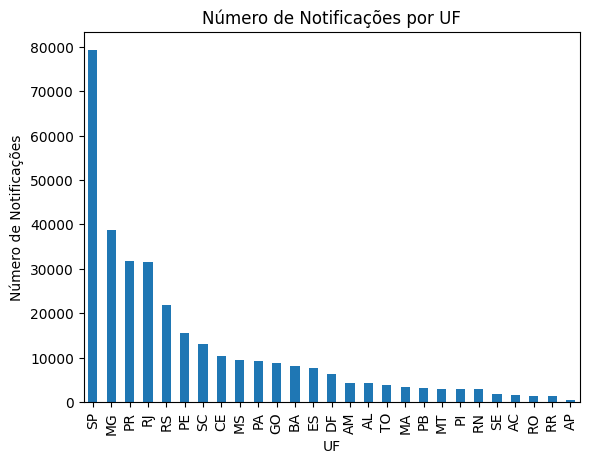

In [ ]:
VIOLBR20['uf_notificacao'].value_counts().plot(kind='bar')
plt.title('Número de Notificações por UF')
plt.ylabel('Número de Notificações')
plt.xlabel('UF')
plt.show()

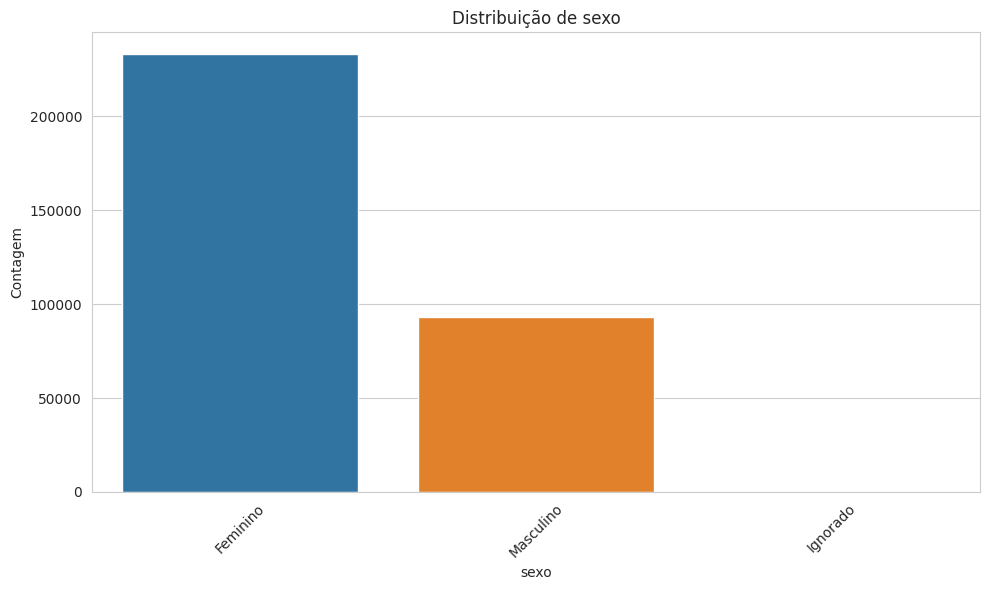

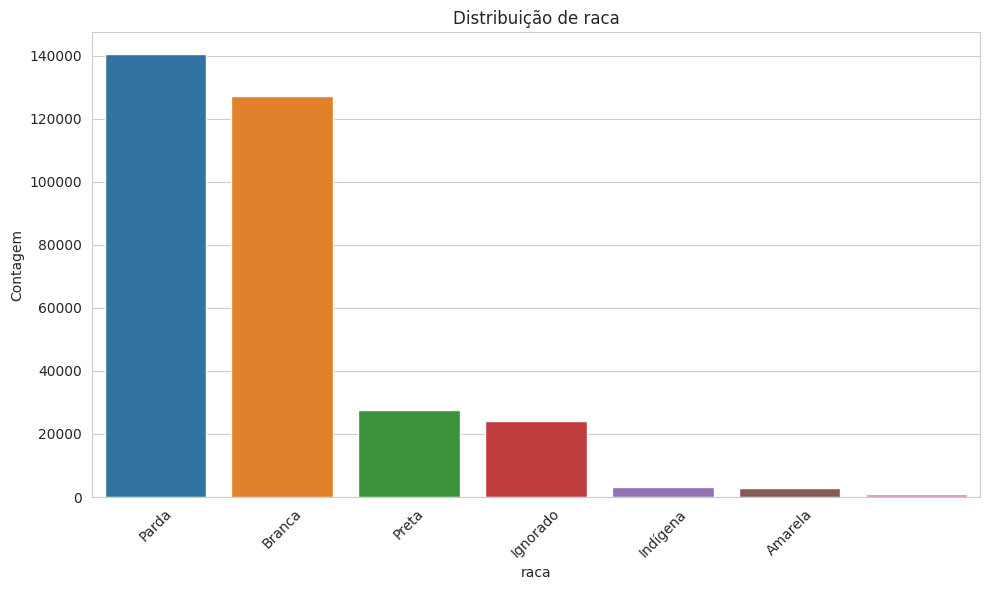

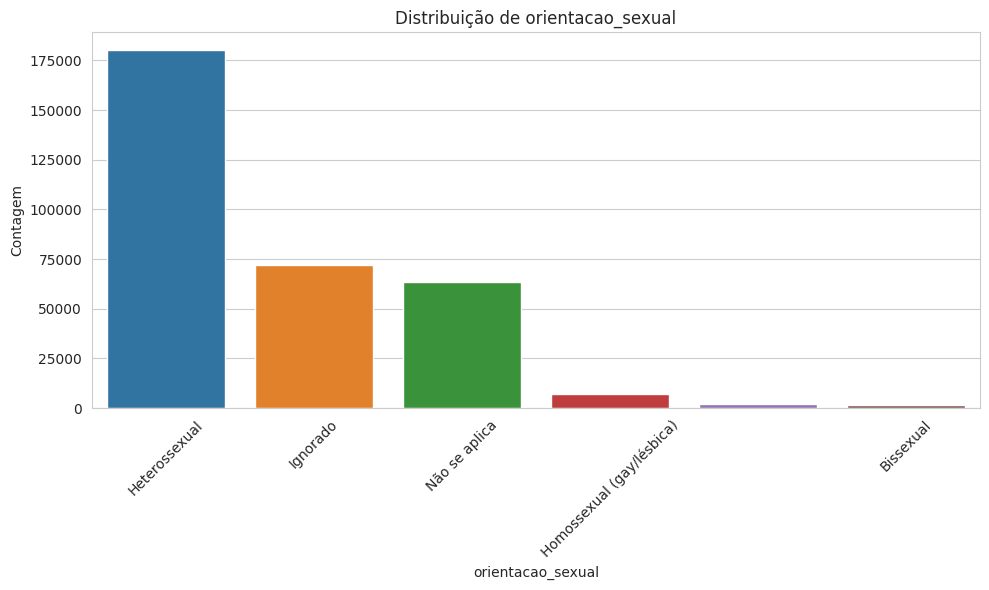

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# configurando o estilo do Seaborn
sns.set_style("whitegrid")

# lista de colunas para visualizar
colunas_visuais = ['sexo', 'raca', 'orientacao_sexual']

# criando gráficos de barras para cada coluna
for coluna in colunas_visuais:
    plt.figure(figsize=(10, 6))  # definindo o tamanho da figura
    sns.countplot(data=VIOLBR20, x=coluna, order=VIOLBR20[coluna].value_counts().index)
    plt.title(f'Distribuição de {coluna}')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)  # rotacionando os rótulos do eixo x para melhor visualização
    plt.tight_layout()
    plt.show()


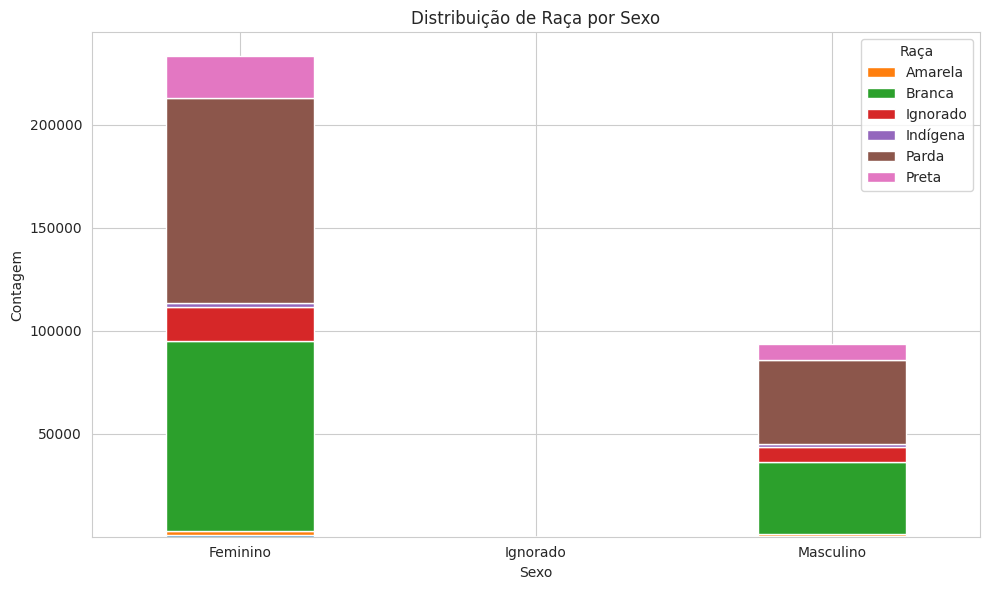

In [ ]:
# criando uma tabela de contingência
tabela_contingencia = pd.crosstab(VIOLBR20['sexo'], VIOLBR20['raca'])

# criando o gráfico de barras empilhadas
tabela_contingencia.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuição de Raça por Sexo')
plt.ylabel('Contagem')
plt.xlabel('Sexo')
plt.xticks(rotation=0)
plt.legend(title='Raça')
plt.tight_layout()
plt.show()


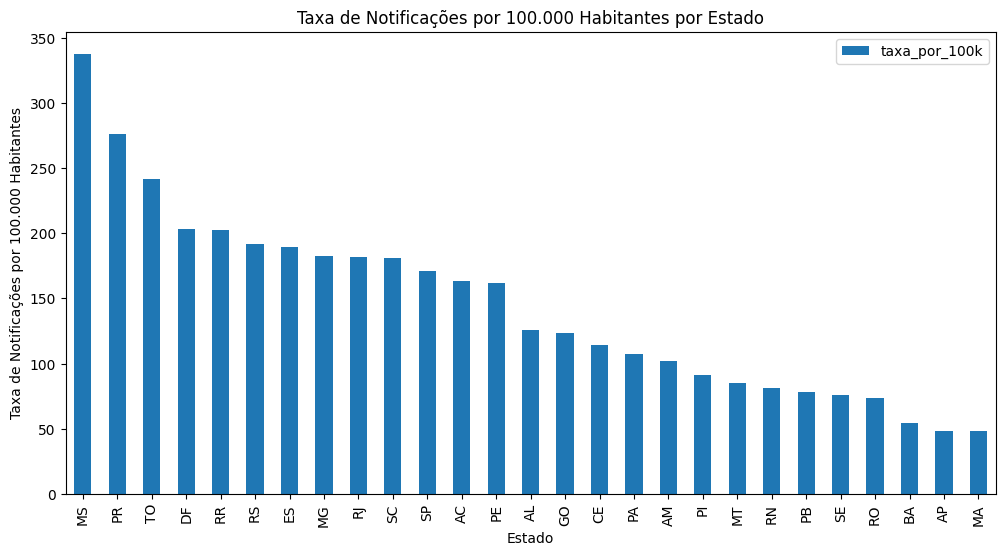

In [ ]:
notificacoes_por_estado = VIOLBR20.groupby('uf_notificacao').size()

df_pop_estados = pd.read_csv('populacaoestados.csv', delimiter=';')

df_pop_estados.set_index('UF', inplace=True)
df_pop_estados['taxa_por_100k'] = (notificacoes_por_estado / df_pop_estados['População']) * 100000

df_pop_estados.sort_values('taxa_por_100k', ascending=False).plot.bar(y='taxa_por_100k', figsize=(12, 6))
plt.title('Taxa de Notificações por 100.000 Habitantes por Estado')
plt.ylabel('Taxa de Notificações por 100.000 Habitantes')
plt.xlabel('Estado')
plt.show()

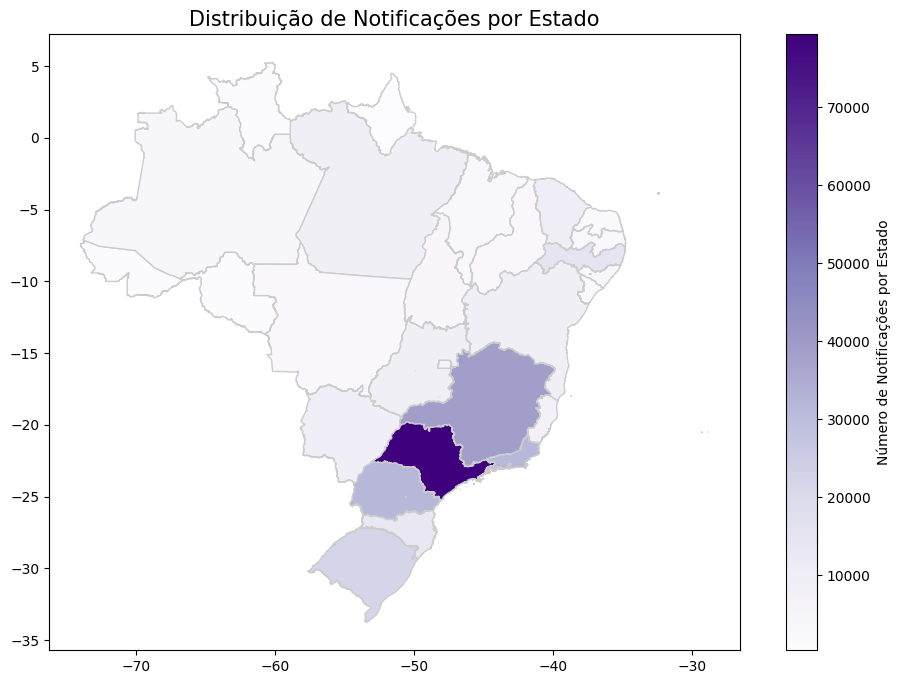

In [ ]:
import zipfile
import os

with zipfile.ZipFile('BR_UF_2022.zip', 'r') as zip_ref:
    zip_ref.extractall('BR_UF_2022')

brasil = gpd.read_file('BR_UF_2022/BR_UF_2022.shp')
brasil = brasil.rename(columns={'SIGLA_UF': 'uf_residencia'})

contagem_por_estado = VIOLBR20['uf_residencia'].value_counts().reset_index()
contagem_por_estado.columns = ['uf_residencia', 'contagem']

# mesclando os dados do mapa base com os dados agrupados
mapa = brasil.set_index('uf_residencia').join(contagem_por_estado.set_index('uf_residencia'))

# criando o mapa coroplético com tons roxos
fig, ax = plt.subplots(figsize=(12, 8))
mapa.plot(column='contagem', ax=ax, legend=True,
          legend_kwds={'label': "Número de Notificações por Estado"},
          cmap='Purples', edgecolor='0.8')
ax.set_title('Distribuição de Notificações por Estado', fontdict={'fontsize': '15', 'fontweight' : '3'})
plt.show()

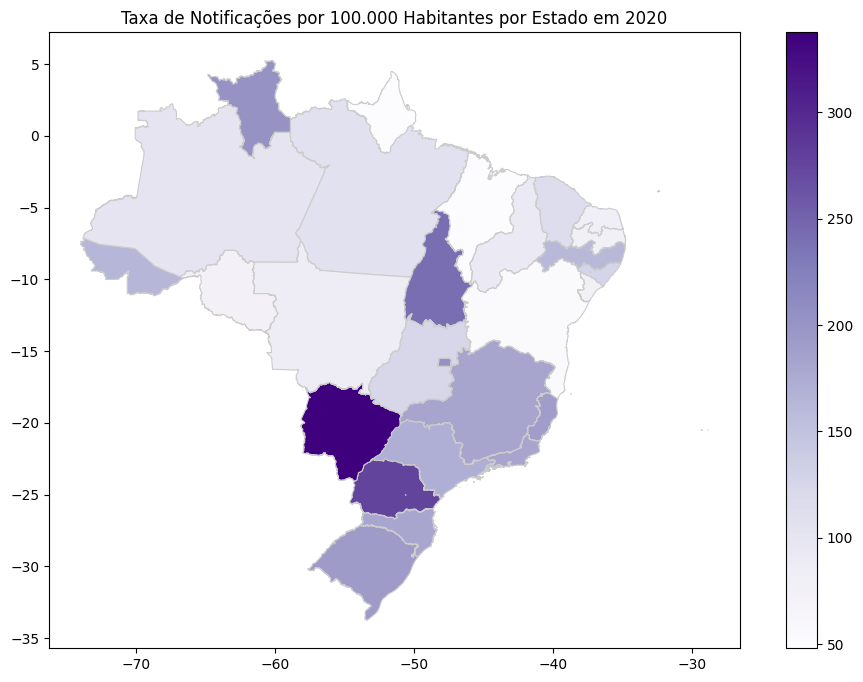

In [ ]:
gdf_estados = gpd.read_file("BR_UF_2022.zip")

gdf_merge = gdf_estados.merge(df_pop_estados.reset_index(), left_on='SIGLA_UF', right_on='UF')

fig, ax = plt.subplots(figsize=(12, 8))
gdf_merge.plot(column='taxa_por_100k', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title("Taxa de Notificações por 100.000 Habitantes por Estado em 2020")
plt.show()



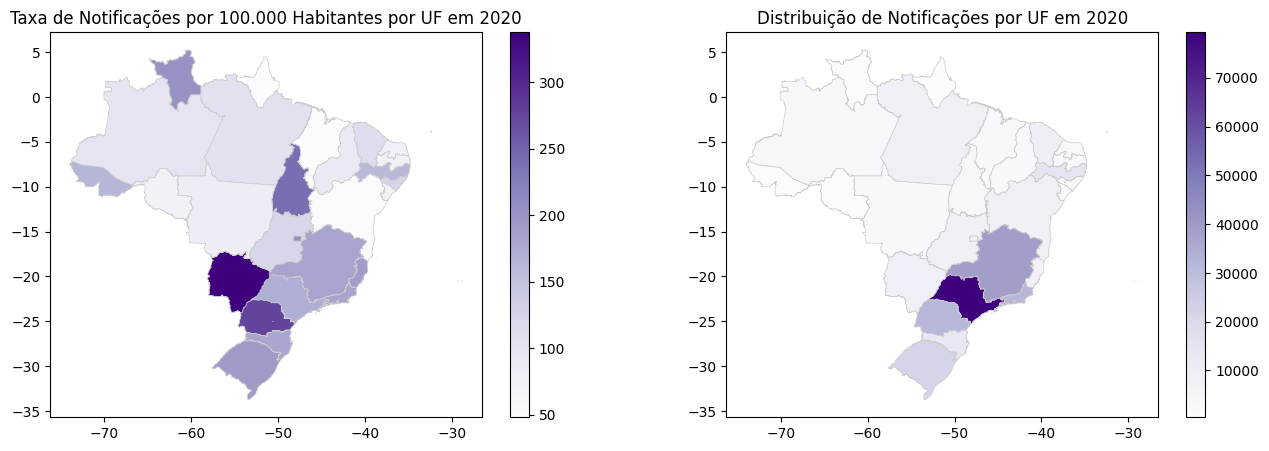

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

mapa.plot(column='contagem', cmap='Purples', linewidth=0.5, ax=ax2, edgecolor='0.8', legend=True)
ax2.set_title('Distribuição de Notificações por UF em 2020')

gdf_merge.plot(column='taxa_por_100k', cmap='Purples', linewidth=0.5, ax=ax1, edgecolor='0.8', legend=True)
ax1.set_title('Taxa de Notificações por 100.000 Habitantes por UF em 2020')

plt.show()


### **A revisar**

In [ ]:
valores_unicos = VIOLBR20['municipio_notificacao'].unique().tolist()
for valor in valores_unicos:
    print(valor)

In [ ]:
for valor in VIOLBR20['ocupacao'].unique():
    print(valor)

In [ ]:
for valor in VIOLBR20['cid_lesao'].unique():
    print(valor)

In [ ]:
print(VIOLBR20['id_unidade'].unique())